In [119]:
import numpy as np
import pandas as pd
import random

from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**:   
X = patient temperature data (assume integers in [32, 46])  
y = 1 (ill)   
y = 0 (not ill)   
           
**Goal**: x=42 => is the patient ill?


## Prepare the data (Data Preprocessing)

### Load the data

In [120]:
# gen features:
np.random.seed(42)
mu = 38
sigma = 3
features_count = 100
x = np.random.normal(mu, sigma, features_count).round(2)

# y = 0 if x < 38.3 else y = 1
y = np.vectorize(lambda i: 0 if i<38.3 else 1)(x)

# we need 2dim for X
# X = np.array([x])
# X = X.T
# or: using -1 for auto-shape
X = x.reshape(-1, 1)

print(X.shape)
print(y.shape)

(100, 1)
(100,)


### Get insight of the data (Prepare and clean)

In [121]:
print( list(zip(X[:,0],y[:]))[:5] )

[(39.49, 1), (37.59, 0), (39.94, 1), (42.57, 1), (37.3, 0)]


#### Clean

we've gen the toy data - so no need to clean

#### Visualize

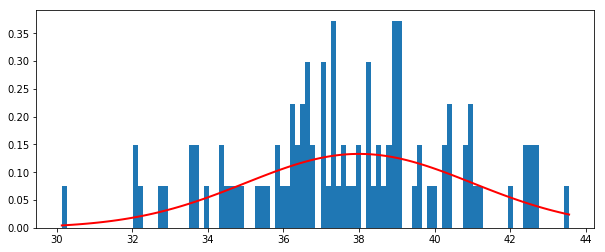

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

bins = 100
count, bins, ignored = plt.hist(x, bins, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')

plt.show()

In [123]:
# let's make a DataFrame:
df = pd.DataFrame(X, columns=["x"])
df['y'] = y
df.head()

,x,y
0,39.49,1
1,37.59,0
2,39.94,1
3,42.57,1
4,37.30,0


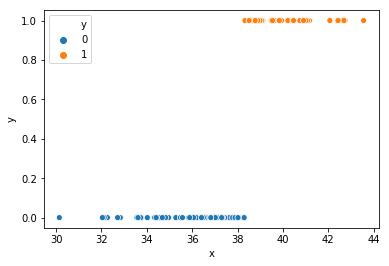

In [124]:
ax = sns.scatterplot(x="x", y="y",hue="y",data=df)

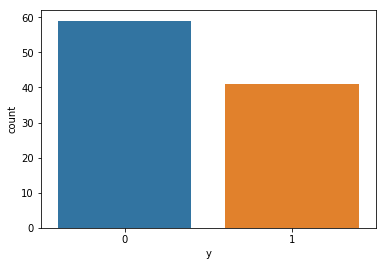

In [125]:
ax = sns.countplot(x="y", data=df)

## Select features

## Separate the training data from the test data

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

n = 5
print(f'Training set - first {n} elements:')
print(list(zip(X_train[:,0], y_train))[:n])

print(f'\nTesting set - first {n} elements:')
print(list(zip(X_test[:,0], y_test))[:n])

Training set - first 5 elements:
[(36.31, 0), (40.22, 1), (38.89, 1), (39.63, 1), (37.89, 0)]

Testing set - first 5 elements:
[(36.45, 0), (39.84, 1), (39.08, 1), (35.84, 0), (33.56, 0)]


## Choose the model

Our features has Gaussian destribution, so will use GaussianNB

In [127]:
# instantiate the model
model = GaussianNB()

## Train the model (fit the model)

In [128]:
fitted = model.fit(X_train,y_train)

## Predict (classify unknown input sample)

In [129]:
# X_iep_test = np.array([38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 40])
# X_iep_test = X_iep_test.reshape(-1, 1)

y_pred_classes = fitted.predict(X_test)
y_pred_proba = fitted.predict_proba(X_test).round(2)
print(sorted(zip(X_test[:,0], y_pred_classes, y_pred_proba[:,0]), 
             key=lambda z:z[2]))



[(42.69, 1, 0.01), (43.56, 1, 0.01), (40.79, 1, 0.03), (39.84, 1, 0.09), (39.49, 1, 0.13), (39.08, 1, 0.22), (38.73, 1, 0.33), (38.59, 1, 0.38), (38.29, 0, 0.5), (38.26, 0, 0.52), (38.2, 0, 0.54), (37.65, 0, 0.77), (37.34, 0, 0.86), (37.3, 0, 0.87), (37.1, 0, 0.91), (36.61, 0, 0.97), (36.45, 0, 0.98), (36.41, 0, 0.98), (35.84, 0, 0.99), (36.19, 0, 0.99), (36.06, 0, 0.99), (33.56, 0, 1.0), (35.28, 0, 1.0), (34.83, 0, 1.0), (34.55, 0, 1.0)]


## Evaluate the model

In [134]:
# score(X, y[, sample_weight])
score = model.score(X_test, y_pred_classes)

r2 = metrics.r2_score(y_test, y_pred_classes)
print(f'score: {score}')
print(f'r2 score: {r2}')

score: 1.0
r2 score: 1.0


In [135]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Yes, such a great score of the model is normal to be reported...   
Remember how we generated the y data? Check it: 
y = np.vectorize(lambda i: 0 if i<38.3 else 1)(x)